# Script para evalur el proceso de clasificar las imagenes satelitales en Python

In [51]:
# Import librerias

import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import geopandas as gpd
import folium 
import numpy as np

In [52]:
# Cargar datos
sitios = pd.read_csv('training_sites_points_raster_value.csv', encoding = 'ISO-8859-1', index_col = [0], sep = ";")

In [54]:
sitios.isna().sum()

Categoria        0
descripcion    113
id_clase         0
geometry         0
B1               0
B2               0
B3               0
B4               0
B5               0
B6               0
B7               0
dtype: int64

# Exploratory analysis

In [55]:
# Exploratory analysis

sitios

,Categoria,descripcion,id_clase,geometry,B1,B2,B3,B4,B5,B6,B7
0,Plantacion,NaN,1,POINT (-73.11308347500469 -39.42803928687321),0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,Plantacion,NaN,1,POINT (-73.11296129010525 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,Plantacion,NaN,1,POINT (-73.1127431027848 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,Plantacion,NaN,1,POINT (-73.11281510460056 -39.42782873610897),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,Plantacion,NaN,1,POINT (-73.1129874725837 -39.42774255211741),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...,...,...,...
119,Bosque Nativo,NaN,2,POINT (-73.07546376639665 -39.370872368780965),-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116
120,Bosque Nativo,NaN,2,POINT (-73.07520127700164 -39.370347389990954),-0.002206,0.002634,0.026806,0.012382,0.266496,0.055557,0.020454
121,Bosque Nativo,NaN,2,POINT (-73.07520127700164 -39.370625319938604),-0.001299,0.003459,0.030670,0.013592,0.288675,0.055502,0.018721
122,Bosque Nativo,NaN,2,POINT (-73.075185836449 -39.370864648504636),-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116


In [56]:
sitios_num = sitios.iloc[:,4:]
sitios_num.describe()

,B1,B2,B3,B4,B5,B6,B7
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.029317,0.035743,0.057037,0.051170,0.259510,0.131820,0.085386
std,0.041764,0.048549,0.055995,0.063702,0.090752,0.105456,0.094882
min,-0.002206,0.002345,0.007515,0.003307,0.094525,0.026779,0.011104
25%,0.002111,0.003912,0.012125,0.006772,0.186320,0.039126,0.014307
50%,0.003397,0.006277,0.031426,0.014115,0.255441,0.063120,0.022695
75%,0.026847,0.028993,0.065182,0.047782,0.318451,0.220097,0.106377
max,0.137618,0.170397,0.198228,0.217505,0.427605,0.324755,0.284220


In [57]:
# contar el numero de NA por columna
sitios

,Categoria,descripcion,id_clase,geometry,B1,B2,B3,B4,B5,B6,B7
0,Plantacion,NaN,1,POINT (-73.11308347500469 -39.42803928687321),0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,Plantacion,NaN,1,POINT (-73.11296129010525 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,Plantacion,NaN,1,POINT (-73.1127431027848 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,Plantacion,NaN,1,POINT (-73.11281510460056 -39.42782873610897),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,Plantacion,NaN,1,POINT (-73.1129874725837 -39.42774255211741),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...,...,...,...
119,Bosque Nativo,NaN,2,POINT (-73.07546376639665 -39.370872368780965),-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116
120,Bosque Nativo,NaN,2,POINT (-73.07520127700164 -39.370347389990954),-0.002206,0.002634,0.026806,0.012382,0.266496,0.055557,0.020454
121,Bosque Nativo,NaN,2,POINT (-73.07520127700164 -39.370625319938604),-0.001299,0.003459,0.030670,0.013592,0.288675,0.055502,0.018721
122,Bosque Nativo,NaN,2,POINT (-73.075185836449 -39.370864648504636),-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116


In [58]:
# Ahora queremos el valor medio por grupo
sitios_gr = sitios.loc[:,['id_clase','B1','B2','B3','B4','B5','B6','B7']]
sitios_gr


,id_clase,B1,B2,B3,B4,B5,B6,B7
0,1,0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,1,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,1,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,1,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,1,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...
119,2,-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116
120,2,-0.002206,0.002634,0.026806,0.012382,0.266496,0.055557,0.020454
121,2,-0.001299,0.003459,0.030670,0.013592,0.288675,0.055502,0.018721
122,2,-0.001175,0.003830,0.033255,0.014417,0.308021,0.055420,0.018116


In [59]:
sitios_mean = sitios_gr.groupby(by = ['id_clase']).mean()
sitios_mean  

,B1,B2,B3,B4,B5,B6,B7
id_clase,,,,,,,
1,0.002207,0.004155,0.010758,0.006066,0.165278,0.036665,0.013854
2,0.000953,0.004688,0.028948,0.012986,0.281548,0.058720,0.020213
3,0.024259,0.027669,0.060558,0.044445,0.403508,0.213390,0.099787
4,0.101846,0.120056,0.151580,0.161806,0.266998,0.282077,0.245422


<Axes: >

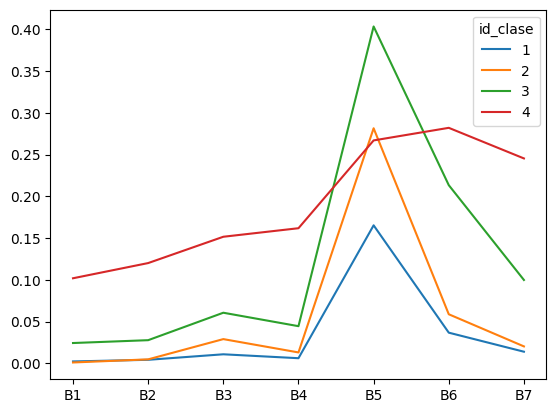

In [60]:
sitios_mean.transpose().plot() ## Como podemos modificar la Leyenda para colocar los nombre de las categorias.


<Axes: >

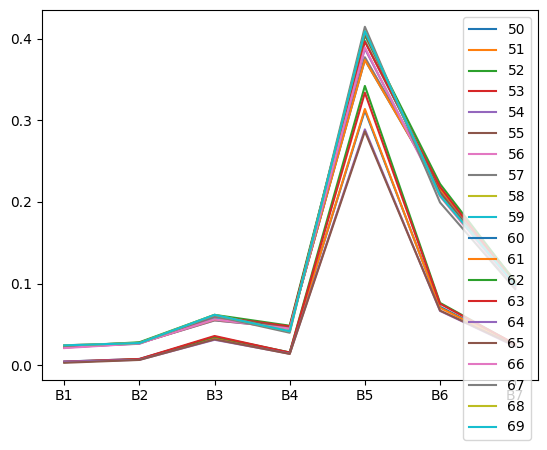

In [61]:
## Scatterplot para ver las firmas espectrales
sitios.iloc[50:70,4:].transpose().plot()

array([[<Axes: title={'center': 'B1'}>, <Axes: title={'center': 'B2'}>,
        <Axes: title={'center': 'B3'}>],
       [<Axes: title={'center': 'B4'}>, <Axes: title={'center': 'B5'}>,
        <Axes: title={'center': 'B6'}>],
       [<Axes: title={'center': 'B7'}>, <Axes: >, <Axes: >]], dtype=object)

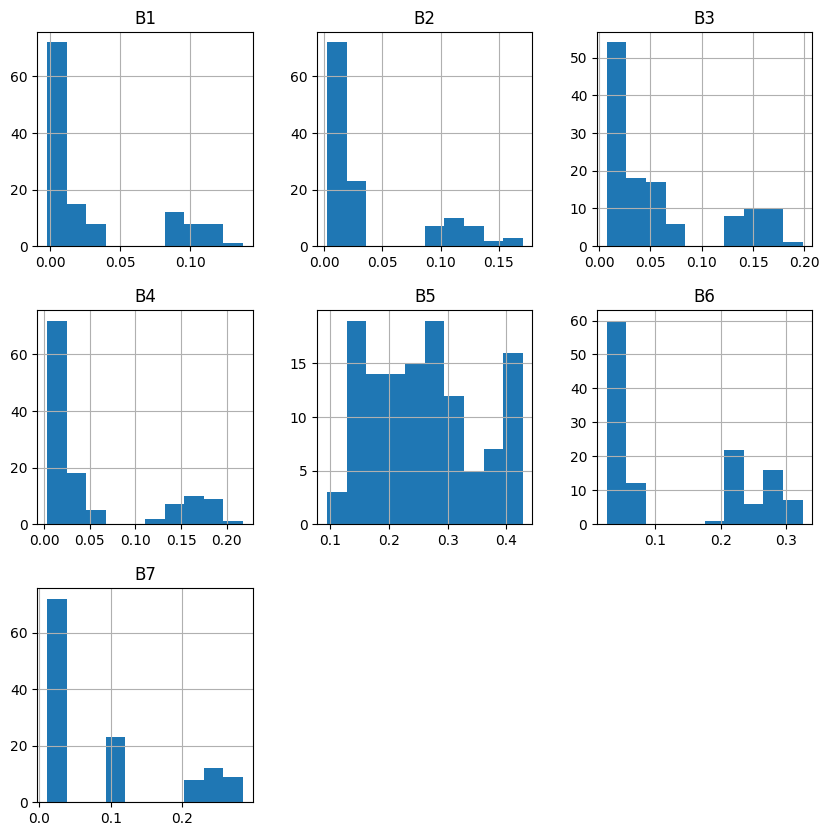

In [62]:
(sitios.loc[:,['B1','B2','B3','B4','B5','B6', 'B7']]).hist(figsize=(10,10))

<Axes: xlabel='B1', ylabel='B5'>

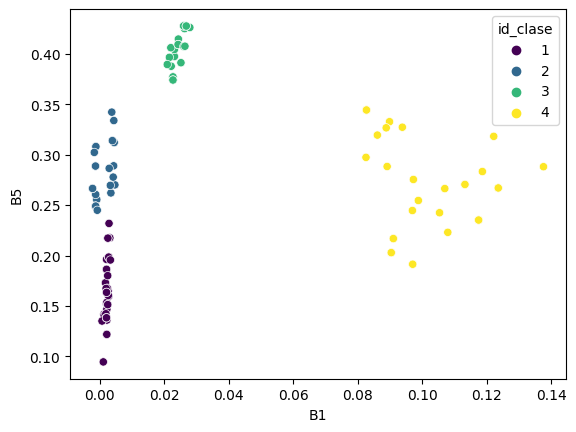

In [63]:
sns.scatterplot(sitios, x = 'B1', y = 'B5', hue = 'id_clase', palette="viridis")

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#%matplotlib inline

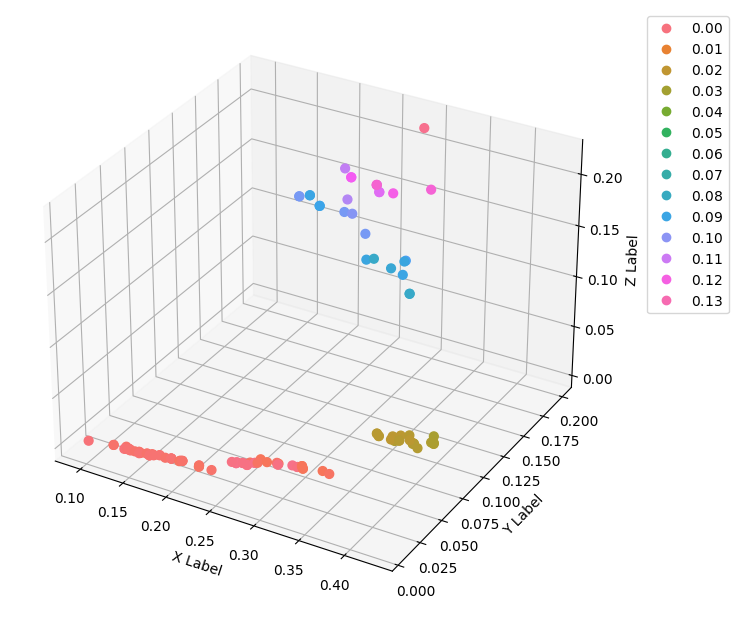

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


# Create a new figure
fig = plt.figure(figsize=(6,6))

# Add a 3D subplot
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 160).as_hex())

# Create a scatter plot
sc = ax.scatter(sitios['B5'], sitios['B3'], sitios['B4'], s=40, c= sitios['B1'], marker='o', cmap=cmap, alpha=1)

# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Create a legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# Show the plot
plt.show()

In [66]:
# Ahora vamos a hacer los graficos interactivos usando plotly



<Axes: >

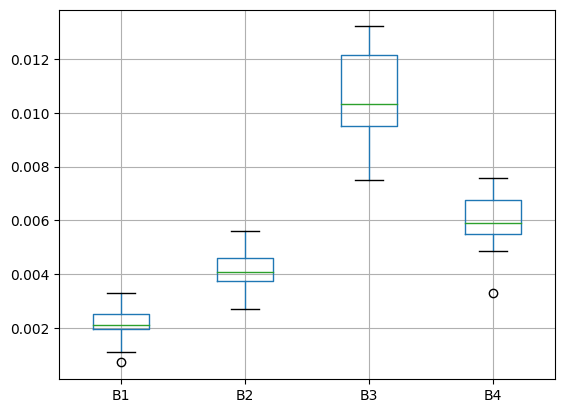

In [67]:
### Vamos a filtrar por categoria

sitios_gr.query('id_clase == 1').iloc[:,1:5
                            ].boxplot()




<Axes: >

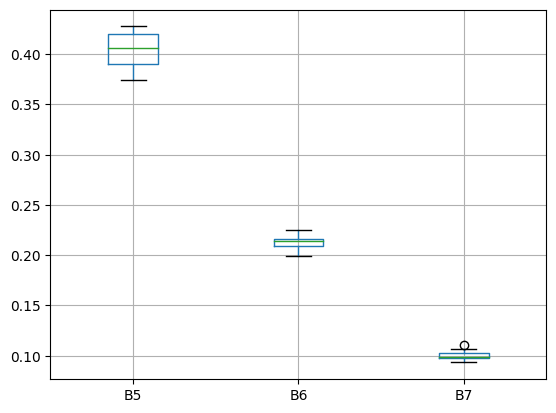

In [68]:
sitios_gr.query('id_clase == 3').iloc[:,5:8
                            ].boxplot()

<Axes: >

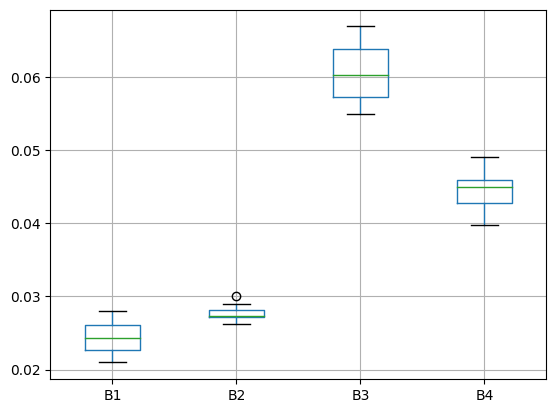

In [69]:
sitios_gr.query('id_clase == 3').iloc[:,1:5
                            ].boxplot()

<Axes: >

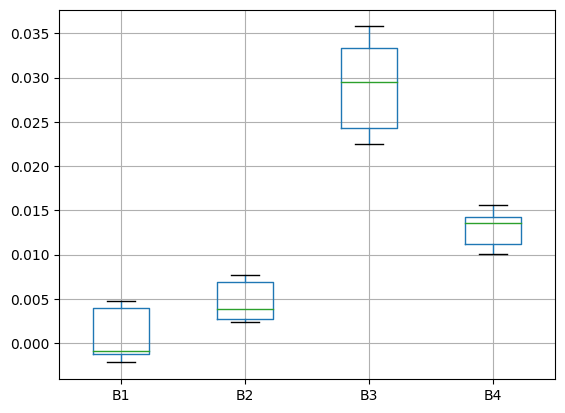

In [70]:
sitios_gr.query('id_clase == 2').iloc[:,1:5
                            ].boxplot()

<Axes: >

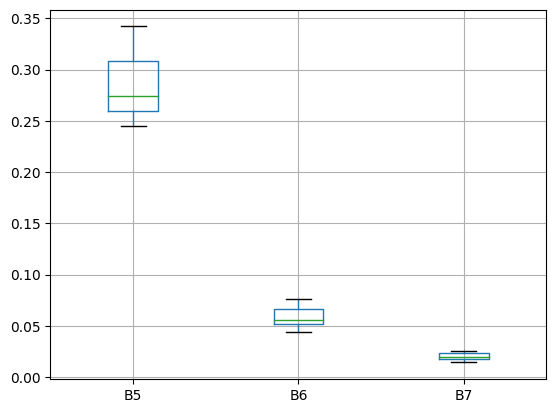

In [71]:
sitios_gr.query('id_clase == 2').iloc[:,5:8
                            ].boxplot()

<Axes: >

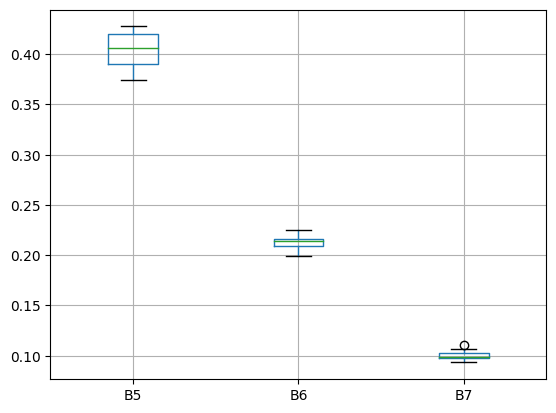

In [72]:
sitios_gr.query('id_clase == 3').iloc[:,5:8
                            ].boxplot()

# Vamos a hacer los graficos interactivos de plotly

In [73]:
import plotly.express as px

## Buscando los hiperparametros.

In [75]:
param_distribution = {
    "n_estimators": [10,20,50,70,100],
    "max_features": ["sqrt","log2",None],
    "max_depth": [None, 10,20,30],
    "min_samples_split" : [2,4,8,10],
    "min_samples_leaf" : [1,2,4],
    "bootstrap" : [True, False]
}

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [77]:
# Iniciamos el clasificador vacio

rfc = RandomForestClassifier(random_state = 42)
search = RandomizedSearchCV(rfc, param_distribution, n_iter = 10, cv = 5, random_state = 42)
search.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [78]:
search.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [53]:
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

In [54]:
best_model = search.best_estimator_
best_model

RandomForestClassifier(bootstrap=False, max_features=None, min_samples_leaf=2,
                       n_estimators=10, random_state=42)

In [55]:
best_params = search.best_params_
best_params

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None,
 'bootstrap': False}

In [56]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report 

In [57]:
print(classification_report(y_train,search.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        23

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [59]:
print(classification_report(y_train,dt.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        23

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [62]:
## Binchag aplicado a un problema de mas de una clase.

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Learn to predict each class against the other using OneVsRestClassifier
classifier = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


NameError: name 'y' is not defined

In [68]:
import rasterio as ras


In [2]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
import numpy as np
from shapely.geometry import mapping


In [70]:
dataset = ras.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\2021\SR_B1_2021.tif')

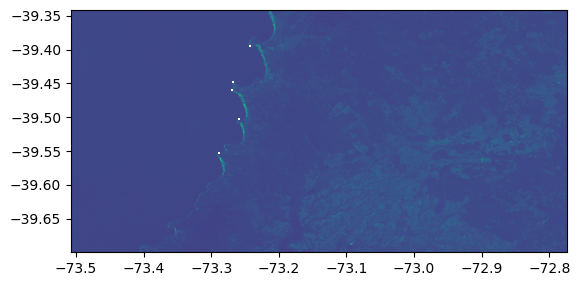

<Axes: >

In [71]:
show(dataset)

In [75]:
# Leemos los datos como un numpy array
image = dataset.read()

In [76]:
# Flatening
reshaped_image = image.reshape(image.shape[0], -1).T

In [82]:
reshaped_image_no_nan = reshaped_image[~np.isnan(reshaped_image).any(axis=1)]

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np



In [1]:
#predictions = search.predict(reshaped_image_no_nan)


#### Aqui hay una pista de como se hace

https://kapernikov.com/tutorial-image-classification-with-scikit-learn/
https://stackoverflow.com/questions/43331510/how-to-train-an-svm-classifier-on-a-satellite-image-using-python
https://medium.com/@northamericangeoscientistsorg/using-python-to-classify-land-cover-from-satellite-imagery-with-convolutional-neural-networks-328fa3ab0180

## Aqui esta el tutorial definitivo. A disfrutar.


https://gist.github.com/om-henners/c6c8d40389dab75cf535 # clasificacion no supervisada
https://towardsdatascience.com/land-cover-classification-in-satellite-imagery-using-python-ae39dbf2929 # No se puede leer
https://www.youtube.com/watch?v=NFoZPyQqVRA # Clasificacion google earth engine
https://medium.com/@northamericangeoscientistsorg/ # Deep learning deep-learning-for-satellite-image-classification-with-python-ceff1cdf41fb

In [ ]:
http://patrickgray.me/open-geo-tutorial/chapter_5_classification.html # Usa la imagen como input para los puntos de entrenamientos
https://geemap.org/notebooks/46_local_rf_training/#save-trees-locally ## Locally trained model with GEE
https://www.sciencedirect.com/science/article/pii/S0303243421001847 # Clasificacion usando deep learning
https://www.linkedin.com/pulse/decision-tree-satellite-image-classification-jo%C3%A3o-otavio/  ## not very useful tutorial

In [ ]:
https://ceholden.github.io/open-geo-tutorial/python/chapter_5_classification.html # Interesting


In [ ]:
https://www.youtube.com/watch?v=CXlGhiJWKGg

In [ ]:
https://github.com/iamtekson/geospatial-machine-learning/blob/main/5.%20Random%20forest%20classification.ipynb